In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os
import time

In [ ]:
'''import zipfile
import os

ZIP_PATH = '/content/dataset.zip'
EXTRACT_PATH = '/content/dataset'


if not os.path.exists(EXTRACT_PATH):
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)

print(" Dataset extracted successfully!")'''


In [2]:
# data loading
data_set_training = "dataset\Training"
data_set_test= "dataset\Testing"

In [3]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(
   data_set_training,
    labels ='inferred',
    label_mode='int',
    class_names=['glioma','meningioma','notumor','pituitary'],
    color_mode ="grayscale",
    batch_size = 32,
    shuffle = True,
    seed = 123)

Found 5712 files belonging to 4 classes.


In [4]:
data_validation = tf.keras.preprocessing.image_dataset_from_directory(
   data_set_test,
    labels ='inferred',
    label_mode='int',
    class_names=['glioma','meningioma','notumor','pituitary'],
    color_mode ="grayscale",
    batch_size = 32,
    shuffle = True,
    seed = 123)

Found 1311 files belonging to 4 classes.


In [5]:
#dataset are preproceesed
#Images are rezised
#images are didvided by 255
data_augmentation = Sequential([

  tf.keras.layers.Resizing(244, 244),
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),


])

pross_train_data = data_train.map(lambda x, y: (data_augmentation(x), y))
pross_test_data = data_validation.map(lambda x, y: (data_augmentation(x), y))

print(pross_train_data)
print(pross_test_data)
validation_data=pross_test_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 244, 244, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 244, 244, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# -----------------------------

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(244, 244, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\ZIGMA LIVE\brain\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
'''reating alexnet model gouri sir
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(244,244,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(4, activation='softmax')
])'''

c:\Users\ZIGMA LIVE\brain\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 242, 242, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 119, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 119, 119, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 57, 57, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,784,964 (98.36 MB)

 Trainable params: 25,784,516 (98.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
#model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
#chatgpt
'''from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(
    pross_train_data,
    validation_data=pross_test_data,
    epochs=50,  # can set higher because early stopping will handle it
    callbacks=[early_stop]
)'''


In [ ]:
hist = model.fit(pross_train_data,validation_data=pross_test_data,  epochs=30,)


In [ ]:
import cv2
import numpy as np

# Load the image from the provided path
image_path = 'dataset/Training/notumor/Tr-no_1594.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Preprocess the image (same steps as used for training data)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (244, 244))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)  # shape: (244, 244, 1)
    image = np.expand_dims(image, axis=0)   # shape: (1, 244, 244, 1)

    # Predict using the trained model
    predictions = model.predict(image)
    print("Raw predictions:", predictions)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Map the predicted class index to the class name
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
    predicted_class_name = class_names[predicted_class_index]

    print("Predicted class index:", predicted_class_index)
    print("Predicted class name:", predicted_class_name)

    # Interpret the prediction
    if predicted_class_name == 'notumor':
        print("The model predicts that this image does NOT contain a brain tumor.")
    else:
        print(f"The model predicts that this image contains a brain tumor of type: {predicted_class_name}")

In [ ]:
test_loss, test_acc = model.evaluate(pross_test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}") 
#chatgpt

In [ ]:
import numpy as np

class_names = ['glioma','meningioma','notumor','pituitary']

for images, labels in pross_test_data.take(1):  # Take one batch
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    print("True labels:", labels.numpy())
    print("Predicted labels:", predicted_labels)


In [61]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.9 MB 10.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/8.9 MB 10.4 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/8.9 MB 9.3 MB/s eta 0:00:01
   ------------------------------- -------- 7.1/8.9 MB 8.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.1/8.9 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 7.8 MB/s  0:00:01
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   - -------------------------------------- 1.6/41.3 MB 6.0 MB/s eta 0:00:07
   --- ------------------------------------ 3.4/41.3 MB 7.7 MB/s eta 0:00:05
   ---- ----------------------------------- 5.0/41.3 MB 8.4 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/41.3 MB 8.2 MB/s eta 0:00:05
   ------- -------------------------------- 8.1/41.3 MB 8.0 MB/s eta 0:00:05
   --------- --------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the entire test set
y_true = []
y_pred = []

for images, labels in pross_test_data:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


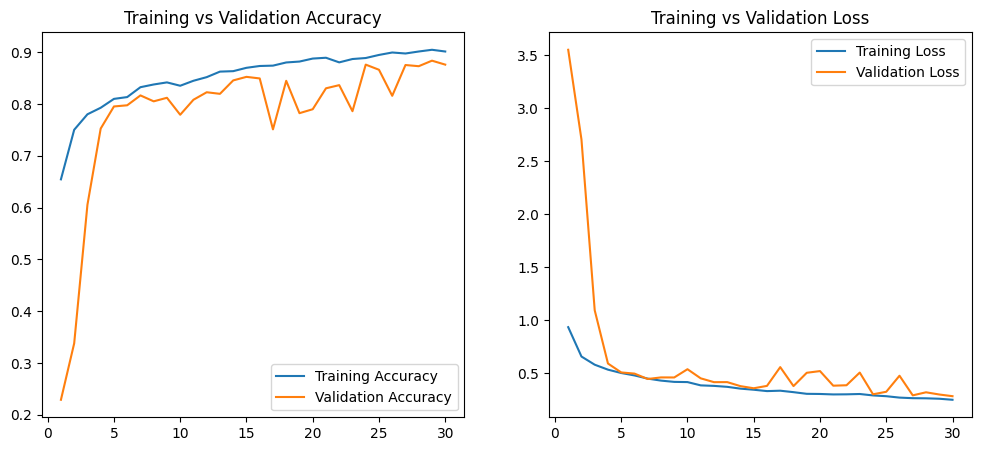

In [73]:
import matplotlib.pyplot as plt

# Get values from training history
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()


In [18]:
pip install opencv-python


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import numpy as np

# Load image using OpenCV
image = cv2.imread('dataset/Training/glioma/Tr-glTr_0006.jpg')

# At this point, `image` is already a NumPy array
print(type(image))  # <class 'numpy.ndarray'>

# But to be explicit (if needed), you can convert like this:
image_array = np.array(image)

# Check shape and dtype
print(image_array.shape)
print(image_array.dtype) 

<class 'numpy.ndarray'>
(512, 512, 3)
uint8


In [20]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image,(244,244))

In [21]:
image.shape

(244, 244)

In [22]:
# creating alexnet model
# Reshape the image to add batch and channel dimensions
image = np.expand_dims(image, axis=-1)  # Add channel dimension
image = np.expand_dims(image, axis=0)   # Add batch dimension

model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step


array([[0., 0., 1., 0.]], dtype=float32)

In [32]:
import cv2
import numpy as np

image = cv2.imread('dataset/Training/notumor/Tr-no_1587.jpg')

# Step 2: Resize to match model input (if needed)
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (244, 244))

# Step 3: Normalize (optional but recommended)
image = image.astype('float32') / 255.0

# Step 4: Add channel and batch dimensions
image = np.expand_dims(image, axis=-1)  # shape: (244, 244, 1)
image = np.expand_dims(image, axis=0)   # shape: (1, 244, 244, 1)

# Step 5: Predict
pred = model.predict(image)
print(pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[[4.2929519e-03 3.0882622e-03 9.9235404e-01 2.6478901e-04]]


In [ ]:
prediction = pred[0]
if prediction[1] > prediction[0]:
  print("Non TUMOR")
else:
  print("TUMOR")

Congratulations You Got TUMOR


In [29]:
predicted_class = np.argmax(pred, axis=1)
print("Predicted class:", predicted_class[0])

Predicted class: 0


# Task
Upload an image from my laptop, preprocess it, and use the loaded model to predict if it contains a brain tumor.

In [30]:
import cv2
import numpy as np

# Load the image from the provided path
image_path = 'dataset/Training/notumor/Tr-no_1594.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Preprocess the image (same steps as used for training data)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (244, 244))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)  # shape: (244, 244, 1)
    image = np.expand_dims(image, axis=0)   # shape: (1, 244, 244, 1)

    # Predict using the trained model
    predictions = model.predict(image)
    print("Raw predictions:", predictions)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Map the predicted class index to the class name
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
    predicted_class_name = class_names[predicted_class_index]

    print("Predicted class index:", predicted_class_index)
    print("Predicted class name:", predicted_class_name)

    # Interpret the prediction
    if predicted_class_name == 'notumor':
        print("The model predicts that this image does NOT contain a brain tumor.")
    else:
        print(f"The model predicts that this image contains a brain tumor of type: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Raw predictions: [[4.1377850e-04 1.1915152e-05 9.9956912e-01 5.1759307e-06]]
Predicted class index: 2
Predicted class name: notumor
The model predicts that this image does NOT contain a brain tumor.


In [ ]:
# Save the full model in the native Keras format
model.save('model.keras')
